# Packages

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

from IPython.display import HTML

# Introductory Example

In [2]:
path = r"D:\Documents\Nextcloud\Studium\Mathematik\Masterstudium\SE Mathematical_Computational_Astro_Quantum Physics\Computations\Data\LynxHare.txt"
df = pd.read_csv(path, delim_whitespace=True, header=None, index_col=0)

df.index.name = 'Year'
df.columns = ['Hare', 'Lynx']

df

,Hare,Lynx
Year,,
1845,19.58,30.09
1846,19.60,45.15
1847,19.61,49.15
1848,11.99,39.52
1849,28.04,21.23
...,...,...
1931,19.52,8.31
1932,82.11,16.01
1933,89.76,24.82


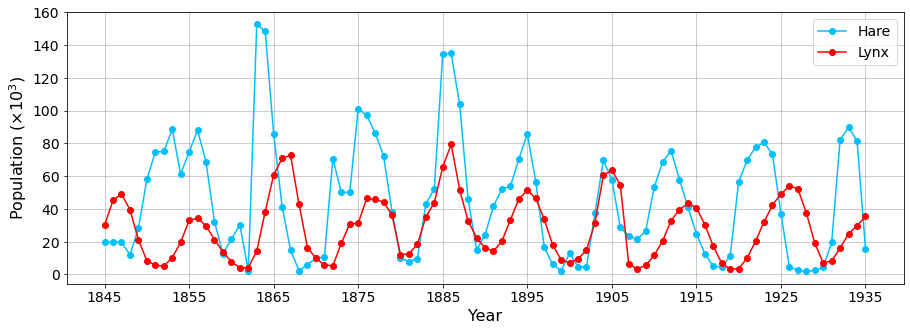

In [3]:
plt.figure(figsize=(15,5))

plt.plot(df.index, df["Hare"], label = "Hare", marker = "o", color = "deepskyblue")
plt.plot(df.index, df["Lynx"], label = "Lynx", marker = "o", color = "red")

plt.grid(alpha = 0.5, color = "grey", which = "both")

plt.xticks(np.arange(1845, 1945, 10), size = 14)
plt.xlabel("Year", size = 16)

plt.yticks(size = 14)
plt.ylabel(r"Population $(\times 10^3)$", size = 16)

plt.legend(fontsize = 14)

plt.savefig("intro_example.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()

# Plots

## Simple 2-dimensional predator-prey model

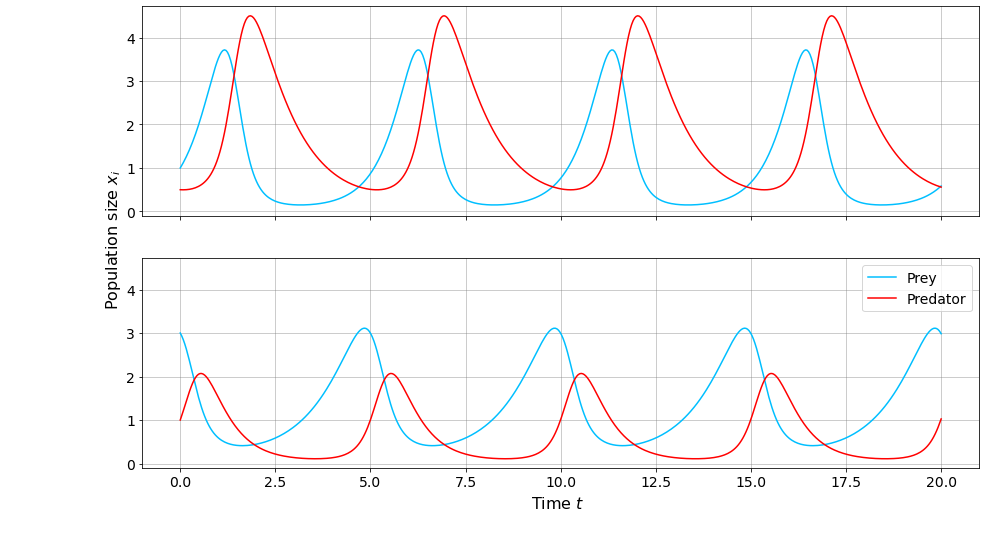

In [11]:
# Define the Lotka-Volterra equations
def lotka_volterra(y, t, r1, a12, r2, a21):
    
    x, z = y
    
    dxdt = r1 * x - a12 * x * z
    dzdt = - r2 * z + a21 * z * x
    
    return [dxdt, dzdt]

# Set the initial conditions and parameters for the first simulation 
initial_conditions = [1, 0.5]  # Initial populations of prey and predator
r1 = 2
a12 = 1.1
r2 = 1
a21 = 0.9

# Create a time vector
t = np.linspace(0, 20, 500)

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a12, r2, a21))

# Extract the populations of prey and predator
x, z = solution.T

# Set the initial conditions and parameters for the second simulation
initial_conditions = [3, 1]  # Initial populations of prey and predator
r1 = 1
a12 = 1.5
r2 = 2
a21 = 1.5

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a12, r2, a21))

# Extract the populations of prey and predator
a, b = solution.T

# Plot the solution
fig, ax = plt.subplots(figsize=(15, 8.5), nrows = 2, ncols = 1, sharex=True, sharey=True)

subfigs = fig.subfigures(2, 1, wspace=0.07)

ax[0].plot(t, x, label = "Prey", color = "deepskyblue")
ax[0].plot(t, z, label = "Predator", color = "red")
#ax[0].set_title(r"Numerical Solutions of the 2-dimensional Predator-Prey-Model", size = 16)

ax[1].plot(t, a, label = "Prey", color = "deepskyblue")
ax[1].plot(t, b, label = "Predator", color = "red")

fig.text(0.51, 0.06, r"Time $t$", ha='center', size = 16)
fig.text(0.09, 0.5, r"Population size $x_i$", va='center', rotation='vertical', size = 16)

for i in [0,1]:
    ax[i].grid(alpha = 0.5, color = "grey", which = "both")
    ax[i].tick_params(axis='y', labelsize=14)
    
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(fontsize = 14)

plt.savefig("solution_2d_simple_model.pdf", pad_inches=0)
plt.show()

In [12]:
# Parameters for the phase space plot
r1 = 2
a12 = 1.1
r2 = 1
a21 = 0.9

C:\Users\Tobias\AppData\Local\Temp/ipykernel_244/96647171.py:10: RuntimeWarning: invalid value encountered in true_divide
  u = u / np.sqrt(u**2 + v**2)


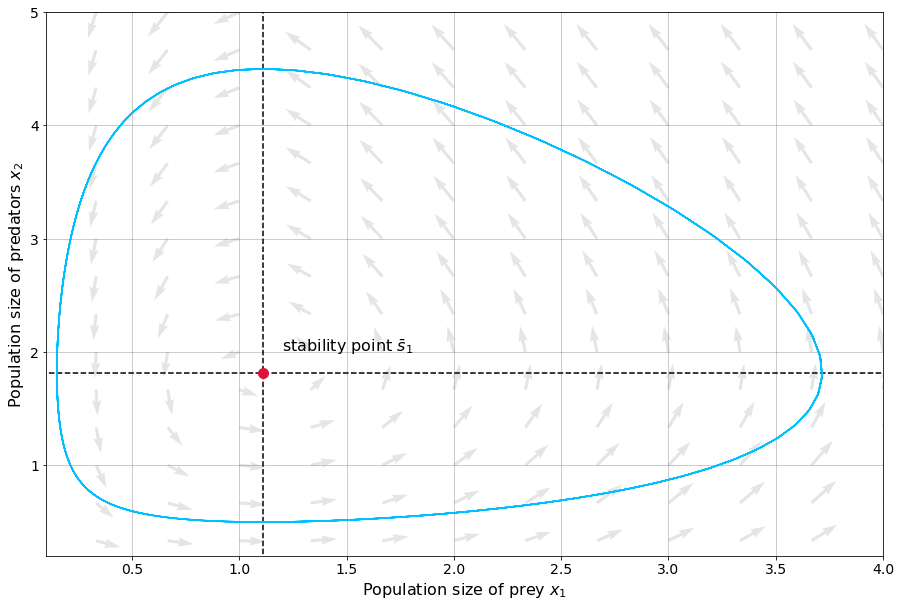

In [13]:
axis = np.linspace(0, 5, 2**4)
X, Y = np.meshgrid(axis, axis)

# Generate the slope field of the system
u = r1*X - a12*X*Y
v = -r2*Y + a21*X*Y

# Normalize Vectors to get the same Length

u = u / np.sqrt(u**2 + v**2)
v = v / np.sqrt(u**2 + v**2)

plt.figure(figsize=(15,10))
#plt.title(r"Phase-Space Representation of the 2-dimensional Predator-Prey-Model", size = 16)

plt.quiver(X,Y,u,v, alpha = 0.1, units='width')
plt.grid(alpha = 0.5, color = "grey", which = "both")

# Phase Space representation of the first solution with x_0 = 1, z_0 = 0.5
plt.plot(x, z, color = "deepskyblue")


plt.vlines(r2/a21, 0, 5, color = "black", linestyle = "--")
plt.hlines(r1/a12, 0, 4, color = "black", linestyle = "--")
plt.plot(r2/a21, r1/a12, color = "crimson", marker = "o", markersize = 10)
plt.annotate(text = r"stability point $\bar{s}_1$", xy = (r2/a21, r1/a12), xytext=(1.2, 2), size = 16)

plt.xlim(0.1, 4)
plt.ylim(0.2, 5)

plt.xticks(size = 14)
plt.xlabel(r"Population size of prey $x_1$", size = 16)

plt.yticks(size = 14)
plt.ylabel(r"Population size of predators $x_2$", size = 16)

#plt.legend(fontsize = 14)

plt.savefig("phase_plot_2d_simple_model.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()

## Competitive 2-species model

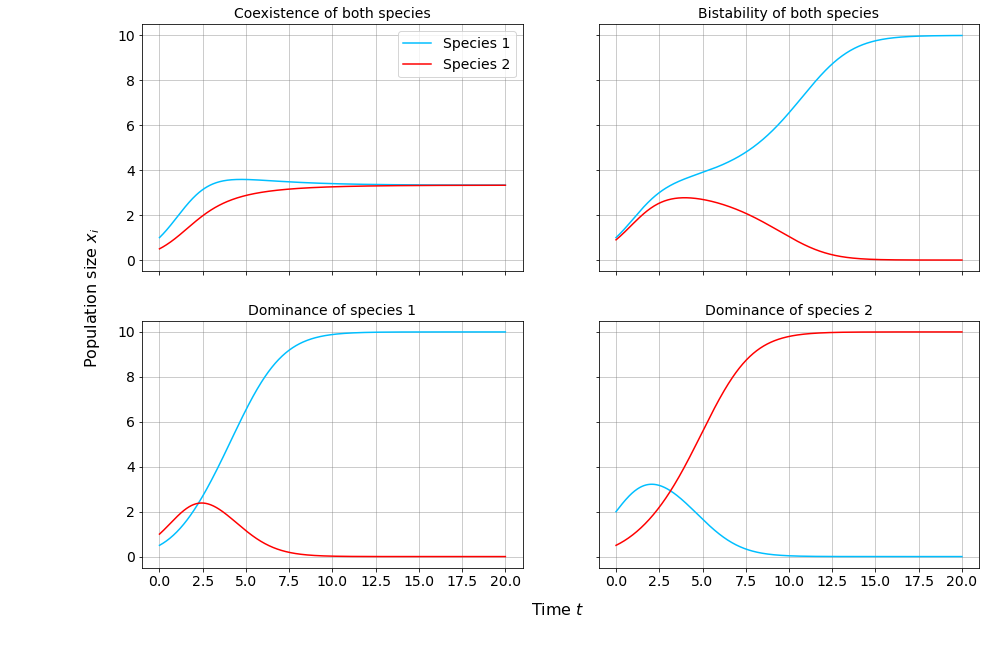

In [7]:
# Define the competitive Lotka-Volterra equations
def lotka_volterra(y, t, r1, a11, a12, r2, a21, a22):
    
    x, z = y
    
    dxdt = r1 * x - a12 * x * z - a11*x**2
    dzdt = r2 * z - a21 * z * x - a22*z**2
    
    return [dxdt, dzdt]

# Create a time vector
t = np.linspace(0, 20, 500)

#Parameters for coexistence of both species
initial_conditions = [1, 0.5]  # Initial populations of species 1 and 2
r1 = 1
a11 = 0.2
a12 = 0.1
r2 = 1
a21 = 0.1
a22 = 0.2

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a11, a12, r2, a21, a22))

# Extract the populations of species 1 and 2
x, z = solution.T

#------------------------------------------------------------------------------

#Parameters for bistability of both species
initial_conditions = [1, 0.9]  # Initial populations of species 1 and 2
r1 = 1
a11 = 0.1
a12 = 0.2
r2 = 1
a21 = 0.2
a22 = 0.1

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a11, a12, r2, a21, a22))

# Extract the populations of species 1 and 2
a, b = solution.T

#------------------------------------------------------------------------------

#Parameters for dominance of species 1
initial_conditions = [0.5, 1]  # Initial populations of species 1 and 2
r1 = 1
a11 = 0.1
a12 = 0.1
r2 = 1
a21 = 0.2
a22 = 0.2

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a11, a12, r2, a21, a22))

# Extract the populations of species 1 and 2
c, d = solution.T

#------------------------------------------------------------------------------

#Parameters for dominance of species 2
initial_conditions = [2, 0.5]  # Initial populations of species 1 and 2
r1 = 1
a11 = 0.2
a12 = 0.2
r2 = 1
a21 = 0.1
a22 = 0.1

# Solve the ODEs using odeint
solution = odeint(lotka_volterra, initial_conditions, t, args=(r1, a11, a12, r2, a21, a22))

# Extract the populations of species 1 and 2
e, f = solution.T

#------------------------------------------------------------------------------

# Plot the solution
fig, ax = plt.subplots(figsize=(15, 10), nrows = 2, ncols = 2, sharex=True, sharey=True)

subfigs = fig.subfigures(2, 2, wspace=0.07)

ax[0,0].plot(t, x, label = "Species 1", color = "deepskyblue")
ax[0,0].plot(t, z, label = "Species 2", color = "red")
ax[0,0].set_title(r"Coexistence of both species", size = 14)

ax[0,1].plot(t, a, label = "Species 1", color = "deepskyblue")
ax[0,1].plot(t, b, label = "Species 2", color = "red")
ax[0,1].set_title(r"Bistability of both species", size = 14)

ax[1,0].plot(t, c, label = "Species 1", color = "deepskyblue")
ax[1,0].plot(t, d, label = "Species 2", color = "red")
ax[1,0].set_title(r"Dominance of species 1", size = 14)

ax[1,1].plot(t, e, label = "Species 1", color = "deepskyblue")
ax[1,1].plot(t, f, label = "Species 2", color = "red")
ax[1,1].set_title(r"Dominance of species 2", size = 14)

fig.text(0.51, 0.06, r"Time $t$", ha='center', size = 16)
fig.text(0.07, 0.5, r"Population size $x_i$", va='center', rotation='vertical', size = 16)

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].grid(alpha = 0.5, color = "grey", which = "both")
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].tick_params(axis='x', labelsize=14)


ax[0,0].legend(fontsize = 14)
#plt.suptitle("Classification of the 2-dimensional Lotka-Volterra Competition Model", size = 16)

plt.savefig("solution_2d_competitive_model.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()

AttributeError: 'Figure' object has no attribute 'set_x'

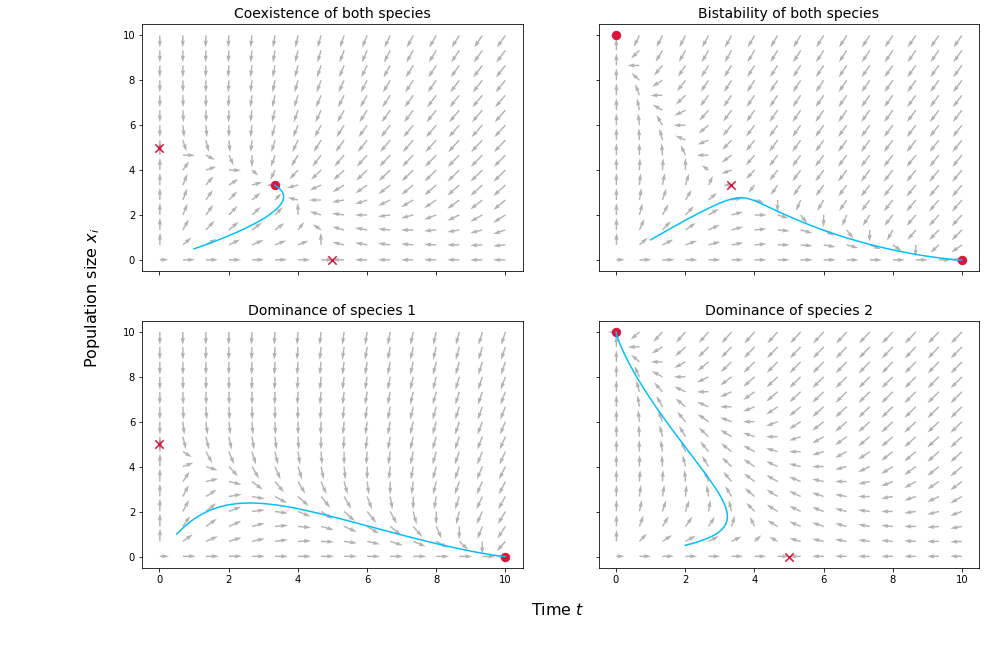

In [8]:
axis = np.linspace(0.01, 10, 2**4)
X, Y = np.meshgrid(axis, axis)

#Parameters for coexistence of both species
r1 = 1
a11 = 0.2
a12 = 0.1
r2 = 1
a21 = 0.1
a22 = 0.2

# Generate the slope field of the system
u1 = r1*X - a12*X*Y - a11*X**2
v1 = r2*Y - a21*X*Y - a22*Y**2

# Normalize Vectors to get the same Length

u1 = u1 / np.sqrt(u1**2 + v1**2)
v1 = v1 / np.sqrt(u1**2 + v1**2)

# Stability points

S1_1 = (0, r2/a22)
S1_2 = (r1/a11, 0)
S1_3 = ((a12*r2 - a22*r1)/(a12*a21 - a11*a22), (-a11*r2 + a21*r1)/(a12*a21 - a11*a22))


#------------------------------------------------------------------------------

#Parameters for bistability of both species
r1 = 1
a11 = 0.1
a12 = 0.2
r2 = 1
a21 = 0.2
a22 = 0.1

# Generate the slope field of the system
u2 = r1*X - a12*X*Y - a11*X**2
v2 = r2*Y - a21*X*Y - a22*Y**2

# Normalize Vectors to get the same Length

u2 = u2 / np.sqrt(u2**2 + v2**2)
v2 = v2 / np.sqrt(u2**2 + v2**2)

# Stability points

S2_1 = (0, r2/a22)
S2_2 = (r1/a11, 0)
S2_3 = ((a12*r2 - a22*r1)/(a12*a21 - a11*a22), (-a11*r2 + a21*r1)/(a12*a21 - a11*a22))


#------------------------------------------------------------------------------

#Parameters for dominance of species 1
r1 = 1
a11 = 0.1
a12 = 0.1
r2 = 1
a21 = 0.2
a22 = 0.2

# Generate the slope field of the system
u3 = r1*X - a12*X*Y - a11*X**2
v3 = r2*Y - a21*X*Y - a22*Y**2

# Normalize Vectors to get the same Length

u3 = u3 / np.sqrt(u3**2 + v3**2)
v3 = v3 / np.sqrt(u3**2 + v3**2)

# Stability points

S3_1 = (0, r2/a22)
S3_2 = (r1/a11, 0)


#------------------------------------------------------------------------------

#Parameters for dominance of species 2
r1 = 1
a11 = 0.2
a12 = 0.2
r2 = 1
a21 = 0.1
a22 = 0.1

# Generate the slope field of the system
u4 = r1*X - a12*X*Y - a11*X**2
v4 = r2*Y - a21*X*Y - a22*Y**2

# Normalize Vectors to get the same Length

u4 = u4 / np.sqrt(u4**2 + v4**2)
v4 = v4 / np.sqrt(u4**2 + v4**2)

# Stability points

S4_1 = (0, r2/a22)
S4_2 = (r1/a11, 0)


#------------------------------------------------------------------------------

# Plot the solution
fig, ax = plt.subplots(figsize=(15, 10), nrows = 2, ncols = 2, sharex=True, sharey=True)

subfigs = fig.subfigures(2, 2, wspace=0.07)

ax[0,0].quiver(X,Y,u1,v1, alpha = 0.3, units='width')
ax[0,0].plot(x, z, color = "deepskyblue")
ax[0,0].set_title(r"Coexistence of both species", size = 14)
ax[0,0].scatter([S1_1[0], S1_2[0]], [S1_1[1], S1_2[1]], color = "crimson", marker = "x", label = "instable", s=70)
ax[0,0].scatter(S1_3[0], S1_3[1], color = "crimson", marker = "o", label = "stable", s = 70)

ax[0,1].quiver(X,Y,u2,v2, alpha = 0.3, units='width')
ax[0,1].plot(a, b, color = "deepskyblue")
ax[0,1].set_title(r"Bistability of both species", size = 14)
ax[0,1].scatter(S2_3[0], S2_3[1], color = "crimson", marker = "x", label = "instable", s=70)
ax[0,1].scatter([S2_1[0], S2_2[0]], [S2_1[1], S2_2[1]], color = "crimson", marker = "o", label = "stable", s = 70)

ax[1,0].quiver(X,Y,u3,v3, alpha = 0.3, units='width')
ax[1,0].plot(c, d, color = "deepskyblue")
ax[1,0].set_title(r"Dominance of species 1", size = 14)
ax[1,0].scatter(S3_1[0], S3_1[1], color = "crimson", marker = "x", label = "instable", s=70)
ax[1,0].scatter(S3_2[0], S3_2[1], color = "crimson", marker = "o", label = "stable", s = 70)


ax[1,1].quiver(X,Y,u4,v4, alpha = 0.3, units='width')
ax[1,1].plot(e, f, color = "deepskyblue")
ax[1,1].set_title(r"Dominance of species 2", size = 14)
ax[1,1].scatter(S4_2[0], S4_2[1], color = "crimson", marker = "x", label = "instable", s=70)
ax[1,1].scatter(S4_1[0], S4_1[1], color = "crimson", marker = "o", label = "stable", s = 70)

fig.text(0.51, 0.06, r"Time $t$", ha='center', size = 16)
fig.text(0.07, 0.5, r"Population size $x_i$", va='center', rotation='vertical', size = 16)

fig.set_x

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].grid(alpha = 0.5, color = "grey", which = "both")
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].tick_params(axis='x', labelsize=14)


ax[0,0].legend(loc = "upper right", fontsize = 14)
#plt.suptitle(r"Phase-Space Representation of the 2-dimensional Competition Model", size = 16)

plt.savefig("phase_plots_2d_competitive_model.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()

In [ ]:
fig??

## Paradox of Pesticides

In [ ]:
# Define the Pest Resurgence Model

def pest_model(y, t, r1, a12, r2, a21, epsilon, T, alpha, beta):
    
    x, z = y
    
    if T < t < T + epsilon:
        dxdt = r1 * x - a12 * x * z - alpha/(epsilon)
        dzdt = - r2 * z + a21 * z * x - beta/(epsilon)
    
    else:
        dxdt = r1 * x - a12 * x * z
        dzdt = - r2 * z + a21 * z * x
    
    return [dxdt, dzdt]


# Create a time vector
t = np.linspace(0, 20, 500)

# Set the initial conditions and parameters for the first simulation
initial_conditions = [1, 0.5]  # Initial populations of prey and predator
r1 = 1
a12 = 1
r2 = 1
a21 = 0.5
T = 3.5
epsilon = 0.07
alpha = 1.4
beta = 0.7

# Solve the ODEs using odeint
solution = odeint(pest_model, initial_conditions, t, args=(r1, a12, r2, a21, epsilon, T, alpha, beta))

# Extract the populations of species 1 and 2
x, z = solution.T


# Set the initial conditions and parameters for the second simulation
initial_conditions = [1, 0.5]  # Initial populations of prey and predator
r1 = 1
a12 = 1
r2 = 1
a21 = 0.5
T = 2.5
epsilon = 0.047
alpha = 0.94
beta = 0.7

# Solve the ODEs using odeint
solution = odeint(pest_model, initial_conditions, t, args=(r1, a12, r2, a21, epsilon, T, alpha, beta))

# Extract the populations of species 1 and 2
a, b = solution.T


# Quiverfield
axis = np.linspace(0, 12, 2**4)
X, Y = np.meshgrid(np.linspace(0, 11, 2**4), np.linspace(0, 6, 2**4))

# Generate the slope field of the system
u = r1*X - a12*X*Y
v = -r2*Y + a21*X*Y

# Normalize Vectors to get the same Length

u = u / np.sqrt(u**2 + v**2)
v = v / np.sqrt(u**2 + v**2)

plt.figure(figsize=(15,10))
#plt.title(r"Trajectories of pesticide forced orbits in the 2-dimensional Predator-Prey-Model", size = 16)

plt.quiver(X,Y,u,v, alpha = 0.1, units='width')
plt.grid(alpha = 0.5, color = "grey", which = "both")
plt.plot(r2/a21, r1/a12, color = "crimson", marker = "o", markersize = 10)
plt.annotate(text = r"$\bar{s}_1$", xy = (r2/a21, r1/a12), xytext=(r2/a21+0.1, r1/a12+0.1), size = 16)
plt.annotate(text = "start", xy = (x[0], z[0]), xytext=((x[0]+0.1, z[0]+0.1)), size = 16)
plt.plot(x[0], z[0], color = "blue", marker = "o", markersize = 10)


# Phase Space representation of the first solution with x_0 = 1, z_0 = 0.5
plt.plot(x, z, color = "deepskyblue", label = r"$T = 3.5$")

# Phase Space representation of the first solution with x_0 = 1, z_0 = 0.5
plt.plot(a, b, color = "red", label = r"$T = 2$")

# Point to the application time
plt.annotate(text = "application time $T$", xy=(3.2, 1.95), xytext = (6, 1.5), size = 16, color='black',
            arrowprops=dict(arrowstyle="-|>"))
plt.annotate(text = "", xy=(4.1, 0.7), xytext = (6, 1.5), size = 16, color='black',
            arrowprops=dict(arrowstyle="-|>"))

plt.xticks(size = 14)
plt.xlabel(r"Population size of pest $x_1$", size = 16)

plt.yticks(size = 14)
plt.ylabel(r"Population size of pest's predators $x_2$", size = 16)

plt.xlim(0, 11)
plt.ylim(0, 5.5)

plt.legend(fontsize = 16, loc = "upper right")

plt.savefig("phase_plot_2d_pest_model_4.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()